* Architecture of a classification model - Kiến trúc mô hình phân loại
* Input shapes and output shapes - Shape vào, ra
>* X: features/data (inputs) - đặc trưng, dữ liệu
>* y: labels (outputs) - nhãn
>>* "What class do the inputs belong to?" - các dữ liệu đầu vào thuộc lớp nào
* Creating custom data to view and fit - Tạo dữ liệu tùy chỉnh để xem và điều chỉnh
* Steps in modelling for binary and mutliclass classification- Các bước trong mô hình hóa để phân loại nhị phân và đa lớp
>* Creating a model -  tạo mô hình
>* Compiling a model - Biên dịch mô hình
>>* Defining a loss function - xác định hàm mất mát
>>* Setting up an optimizer - Thiết lập trình tối ưu hóa
>>>* Finding the best learning rate - Tìm tốc độ học tốt nhất
>>*  Creating evaluation metrics - Tạo chỉ số đánh giá
>* Fitting a model (getting it to find patterns in our data) - Hợp mô hình
>* Improving a model - Cải tiến một mô hình
* The power of non-linearity - Sức mạnh của phi tuyến tính
* Evaluating classification models - Đánh giá mô hình phân loại
>* Visualizng the model ("visualize, visualize, visualize") - Hình dung
>* Looking at training curves - Xem xét đường cong huấn luyện
>* Compare predictions to ground truth (using our evaluation metrics) -  So sánh các dự đoán với sự thật cơ bản

# **Typical architecture of a classification neural network**



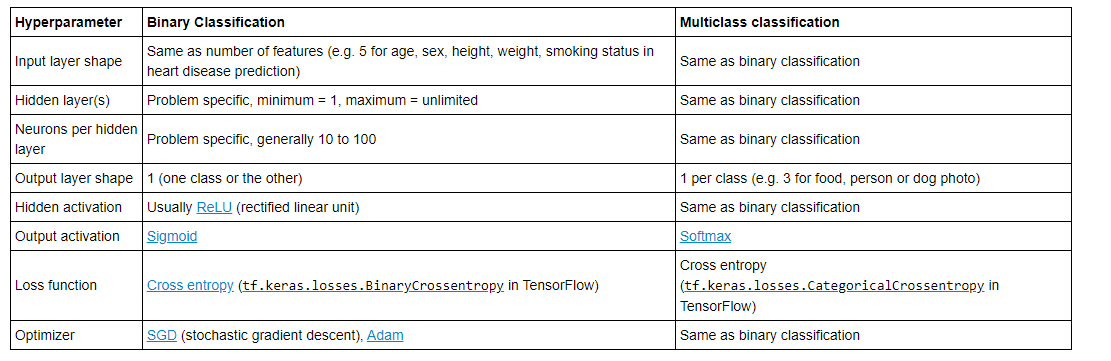

***Source:***  Adapted from page 295 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


# **Creating data to view and fit**

Chúng ta có thể bắt đầu bằng cách nhập một tập dữ liệu phân loại nhưng hãy thực hành tạo một số dữ liệu phân loại của riêng chúng ta.

Vì phân loại là dự đoán xem một thứ là thứ này hay thứ khác, chúng ta hãy tạo một số dữ liệu để phản ánh điều đó.

Chúng ta sẽ sử dụng hàm `make_circles()` của Scikit-Learn để tạo một tập dữ liệu mẫu .

In [ ]:
from sklearn.datasets import  make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=42)

In [ ]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# See the first 10 labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [ ]:
# Check out the different labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

Chúng ta đang giải quyết vấn đề phân loại nhị phân. Nó là hệ nhị phân vì chỉ có hai nhãn (0 hoặc 1).

Chúng ta hãy hình dung thêm một bước và vẽ biểu đồ dữ liệu của chúng ta.

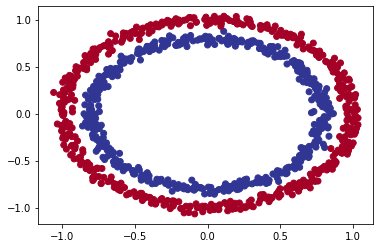

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

# **Input and output shapes**

Một trong những vấn đề phổ biến nhất sẽ gặp phải khi xây dựng mạng nơ-ron là hình dạng không khớp.

Cụ thể hơn là hình dạng của dữ liệu đầu vào và hình dạng của dữ liệu đầu ra.

Vì vậy, chúng ta hãy kiểm tra hình dạng của X và y

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# Check how many samples we have
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

Chúng ta có hai đặc điểm X dẫn đến một giá trị y.

Điều này có nghĩa là hình dạng đầu vào mạng nơ-ron của chúng ta sẽ phải chấp nhận một tensor có ít nhất một chiều là hai và đầu ra tensor có ít nhất một giá trị.

# **Steps in modelling**



In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 4.1198 - accuracy: 0.4378
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7207 - accuracy: 0.5530
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7033 - accuracy: 0.4836
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5180
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5157


Nhìn vào chỉ số độ chính xác, mô hình của chúng ta hoạt động kém (độ chính xác 50% đối với một bài toán phân loại nhị phân tương đương với việc đoán), nhưng điều gì sẽ xảy ra nếu chúng ta đào tạo nó lâu hơn?

In [ ]:
# Train our model for longer (more chances to look at the data)
model_1.fit(X, y, epochs=200, verbose=0) # set verbose=0 to remove training updates
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Ngay cả sau 200 lần truyền dữ liệu, nó vẫn hoạt động như thể nó đang đoán.

Điều gì sẽ xảy ra nếu chúng ta thêm một lớp bổ sung và đào tạo lâu hơn một chút?

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1) 
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0) # set verbose=0 to make the output print less

In [ ]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

Vẫn không tốt như dự đoán (độ chính xác ~ 50%)?

# **Improving a model**



In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0) # fit for 100 passes of the data

In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980252861976624, 0.5080000162124634]

Mô hình vẫn hoạt động chưa được tốt

Hãy thực hiện một số hình dung để xem điều gì đang xảy ra.\

Để hình dung các dự đoán của mô hình, chúng ta sẽ tạo một hàm `plot_decision_boundary()` mà:
* Sử dụng mô hình được đào tạo, các đặc trưng (X) và nhãn (y).
* Tạo meshgrid các giá trị X khác nhau.
* Đưa ra các dự đoán trên meshgrid
* Vẽ đồ thị cho các dự đoán cũng như một đường thẳng giữa các khu vực khác nhau (nơi mỗi lớp duy nhất rơi vào).

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


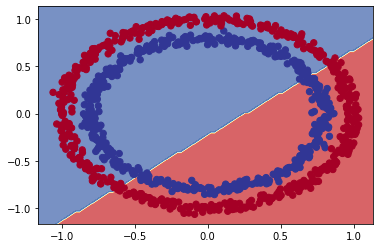

In [ ]:
# Check out the predictions our model is making 
plot_decision_boundary(model_3, X, y)

Có vẻ như mô hình của chúng ta đang cố gắng vẽ một đường thẳng qua dữ liệu.

Vấn đề chính là dữ liệu của chúng ta không thể phân tách bằng một đường thẳng.

Trong một bài toán hồi quy, mô hình của chúng ta có thể hoạt động. Trong thực tế, chúng ta hãy thử nó.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]


In [ ]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 269.0470 - mae: 269.0470
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 154.3811 - mae: 154.3811
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 57.2730 - mae: 57.2730
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 72.9343 - mae: 72.9343
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 74.6513 - mae: 74.6513
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 51.1576 - mae: 51.1576
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 46.7825 - mae: 46.7825
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 45.3201 - mae: 45.3201
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.2766 - mae: 43.2766
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 42.0545 - mae: 42.0545
Epoch 11/100
5/5 [==============================] - 0s 

Được rồi, có vẻ như mô hình của chúng ta đang học được điều gì đó (giá trị mae có xu hướng giảm theo từng epoch), hãy vẽ các dự đoán của nó.

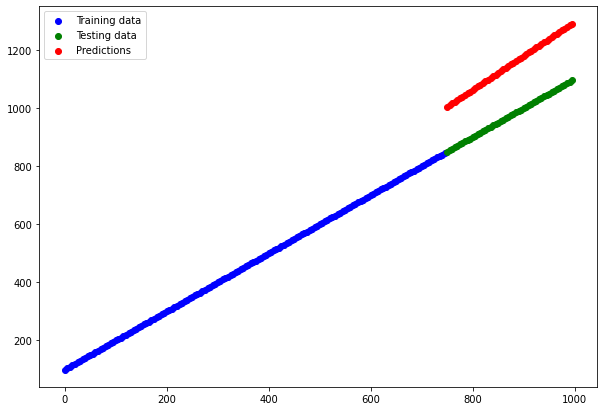

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(y_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

Ta thấy dự đoán không hoàn hảo (nếu dự đoán hoàn hảo, màu đỏ sẽ thẳng hàng với màu xanh lá cây), nhưng chúng trông đẹp hơn so với dự đoán hoàn chỉnh.

Vì vậy, điều này có nghĩa là mô hình của chúng ta phải học được điều gì đó ..



# **The missing piece: Non-linearity**

Vì chúng ta đã thấy mạng nơ-ron của mình có thể lập mô hình các đường thẳng (với khả năng tốt hơn một chút so với đoán).

Còn đối với các đường không thẳng (phi tuyến tính) thì sao?

Nếu chúng ta định mô hình hóa dữ liệu phân loại của mình (các vòng tròn màu đỏ và đầu mối), chúng ta sẽ cần một số đường phi tuyến tính.

Thay đổi chính mà chúng ta sẽ thêm vào các mô hình mà chúng ta đã xây dựng trước đây là việc sử dụng từ khóa kích hoạt(`activation`).

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # "lr" is short for "learning rate"
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.6232 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1719 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2390 - accuracy: 0.4931
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7063 - accuracy: 0.4964
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8439 - accuracy: 0.4827
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.2963 - accuracy: 0.5318
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.3483 - accuracy: 0.5058
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.1405 - accuracy: 0.4998
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 2.9766 - accuracy: 0.4796
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 2.3387 - accuracy: 0.5161
Epoch 11/

Được rồi, mô hình của chúng tôi hoạt động kém hơn một chút so với phỏng đoán.

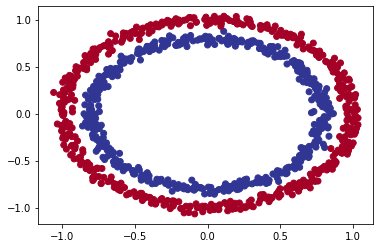

In [ ]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

doing binary classifcation...


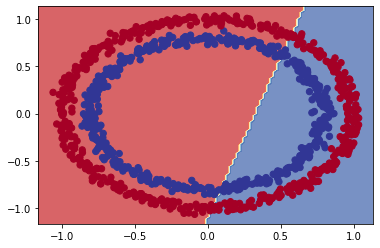

In [ ]:
# Check the deicison boundary (blue is blue class, yellow is the crossover, red is red class)
plot_decision_boundary(model_4, X, y)

Có vẻ như chúng ta lại nhận được dự đoán đường thẳng (tuyến tính).

Nhưng dữ liệu của chúng tôi là phi tuyến tính (không phải là một đường thẳng) 

Những gì chúng ta sẽ phải làm là thêm một số không tuyến tính vào mô hình.



In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation='relu'), # can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer 
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 2.3881 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 1.4914 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 1.4194 - accuracy: 0.4931
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2703 - accuracy: 0.4840
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2634 - accuracy: 0.4301
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1211 - accuracy: 0.4480
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1487 - accuracy: 0.4294
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0766 - accuracy: 0.4462
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0989 - accuracy: 0.4236
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0058 - accuracy: 0.4796
Epoch 11/

Kết quả vẫn chưa ổn 

Chúng ta sẽ tăng lớp ẩn lên 4 trong mỗi layer 

Sẽ thử mô phỏng trên [TensorFlow Playground demo.](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.93799&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&regularizationRate_hide=true&batchSize_hide=true&dataset_hide=true)

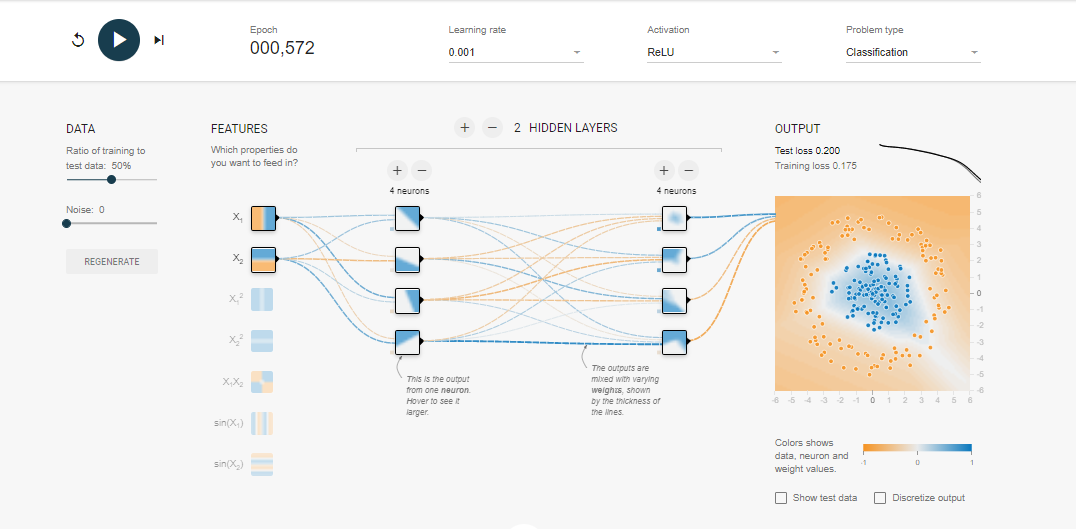

Có vẻ mô hình hoạt động khá tốt

kiểm tra bằng code

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation='relu'), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation='relu'), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=600)

Epoch 1/600
32/32 [==============================] - 1s 1ms/step - loss: 7.9753 - accuracy: 0.4830
Epoch 2/600
32/32 [==============================] - 0s 1ms/step - loss: 7.8983 - accuracy: 0.4880
Epoch 3/600
32/32 [==============================] - 0s 1ms/step - loss: 7.8184 - accuracy: 0.4931
Epoch 4/600
32/32 [==============================] - 0s 1ms/step - loss: 7.7682 - accuracy: 0.4964
Epoch 5/600
32/32 [==============================] - 0s 1ms/step - loss: 7.9795 - accuracy: 0.4827
Epoch 6/600
32/32 [==============================] - 0s 1ms/step - loss: 7.2219 - accuracy: 0.5318
Epoch 7/600
32/32 [==============================] - 0s 1ms/step - loss: 7.6230 - accuracy: 0.5058
Epoch 8/600
32/32 [==============================] - 0s 1ms/step - loss: 7.7149 - accuracy: 0.4998
Epoch 9/600
32/32 [==============================] - 0s 1ms/step - loss: 8.0269 - accuracy: 0.4796
Epoch 10/600
32/32 [==============================] - 0s 1ms/step - loss: 7.4648 - accuracy: 0.5161
Epoch 11/

In [ ]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 959us/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binary classifcation...


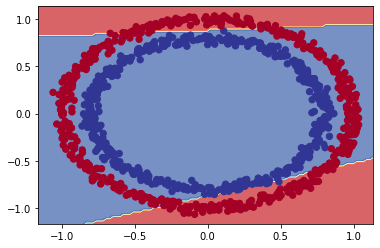

In [ ]:
# Check out the predictions using 2 hidden layers
plot_decision_boundary(model_6, X, y)

Mô hình của chúng ta giống với mô hình trong  TensorFlow Playground nhưng mô hình đó vẫn vẽ các đường thẳng ..

Lý tưởng nhất là các đường màu vàng nằm bên trong vòng tròn màu đỏ và vòng tròn màu xanh lam.

Lần này, chúng ta cũng sẽ thay đổi giá trị `activation` trên lớp đầu ra của chúng tôi. Hãy nhớ kiến ​​trúc của một mô hình phân loại? Đối với phân loại nhị phân, kích hoạt lớp đầu ra thường là giá trị `activation`= `Sigmoid`.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation= 'relu'), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation= 'relu'), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation= 'sigmoid') # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=100, verbose=0)

In [ ]:
# Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.29480037093162537, 0.9909999966621399]

Kết quả nhận được rất tốt


doing binary classifcation...


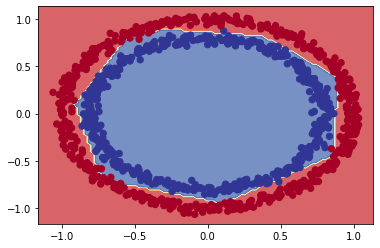

In [ ]:
# View the predictions of the model with relu and sigmoid activations
plot_decision_boundary(model_7, X, y)

 Mô hình của chúng ta gần như hoàn hảo (ngoại trừ một vài ví dụ) tách hai vòng tròn.


# **Evaluating and improving our classification model**

Chúng ta đã đánh giá mô hình của mình trên cùng dữ liệu mà nó đã được đào tạo.

Một cách tiếp cận tốt hơn sẽ là chia dữ liệu của chúng ta thành các tập huấn luyện, xác thực (tùy chọn) và thử nghiệm.

Khi chúng ta đã làm xong, chúng ta sẽ đào tạo mô hình của mình trên tập huấn luyện (để nó tìm các mẫu trong dữ liệu) và sau đó xem nó đã học các mẫu tốt như thế nào bằng cách sử dụng nó để dự đoán các giá trị trên tập thử nghiệm.

In [ ]:
# How many examples are in the whole dataset?
len(X)

1000

In [ ]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set

((800, 2), (200, 2))

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6840 - accuracy: 0.5196
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6816 - accuracy: 0.5344
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.5371
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6685 - accuracy: 0.5943
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6624 - accuracy: 0.5837
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6512 - accuracy: 0.5798
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6428 - accuracy: 0.6507
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6139 - accuracy: 0.7259
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6021 - accuracy: 0.7919
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5724 - accuracy: 0.7704
Epoch 11/25
25/25 [

In [ ]:
# Evaluate our model on the test set
loss, accuracy = model_8.evaluate(X_test, y_test)


7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


In [ ]:
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

Model loss on the test set: 0.12468849867582321
Model accuracy on the test set: 100.00%


100% accuracy

doing binary classifcation...
doing binary classifcation...


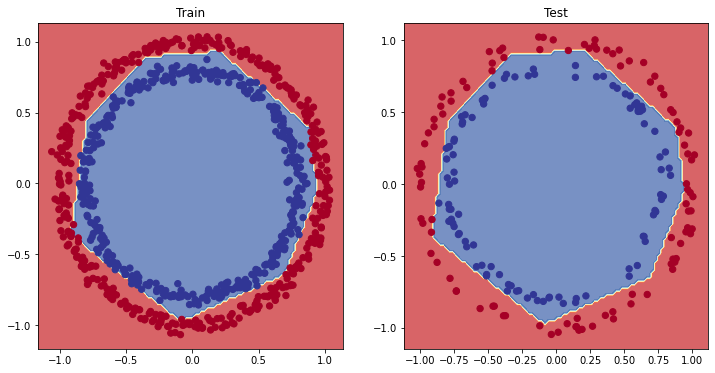

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

Với một vài chỉnh sửa, mô hình của chúng ta hiện dự đoán các vòng tròn màu xanh và đỏ gần như hoàn hảo.

# **Plot the loss curves**

Chúng ta có thể thấy kết quả đầu ra của mô hình là rất tốt.

Nhưng mô hình của chúng ta hoạt động như thế nào trong khi nó đang học hỏi?

Hiệu suất thay đổi như thế nào mỗi khi mô hình có cơ hội xem xét dữ liệu (mỗi epoch một lần)?

Để tìm ra điều này, chúng ta có thể kiểm tra các đường cong tổn thất(**loss curves**) (còn được gọi là đường cong học tập(**learning curves**)).



In [ ]:
# You can access the information in the history variable using the .history attribute
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Kiểm tra kết quả đầu ra, chúng ta có thể thấy giá trị tổn thất giảm xuống và độ chính xác tăng lên.

Text(0.5, 1.0, 'Model_8 training curves')

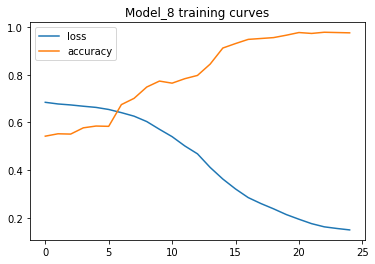

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

# **Finding the best learning rate**

Ngoài bản thân kiến ​​trúc (các lớp, số lượng tế bào thần kinh, kích hoạt, v.v.), siêu tham số quan trọng nhất mà ta có thể điều chỉnh cho các mô hình mạng thần kinh của mình là tốc độ học(**learning rate**).

Trong model_8, chúng ta đã giảm tỷ lệ học tập của trình tối ưu hóa Adam từ mặc định là 0,001 (mặc định) xuống 0,01.

Thủ thuật tìm **learning rate** tối ưu
* A learning rate callback 
* Một mô hình khác.
* Một biểu đồ đường cong tổn thất đã sửa đổi.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"]) 

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(X_train, 
                      y_train, 
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5016
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5065
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5094
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4864
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.4857
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5191
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6799 - accuracy: 0.5292
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6845 - accuracy: 0.5055
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4750
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.4965
Epoch 11/

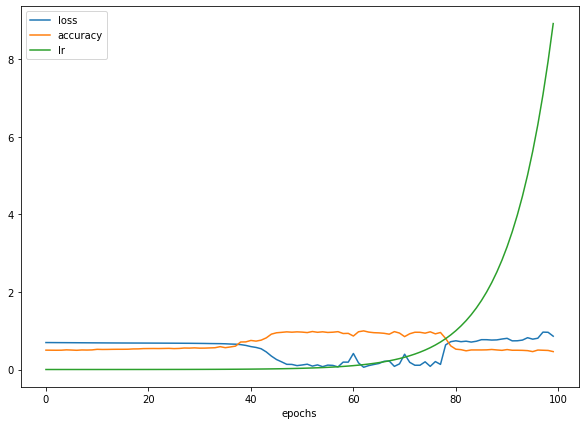

In [ ]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

Ta thấy **learning rate** tăng lên theo cấp số nhân khi số lượng epoch tăng lên

Có thể thấy độ chính xác của mô hình tăng lên (và mất mát giảm xuống) tại một thời điểm cụ thể khi **learning rate** tăng dần.

Để tìm ra điểm uốn này ở đâu, chúng ta có thể vẽ biểu đồ tổn thất so với tỷ lệ học tập theo thang `log`.

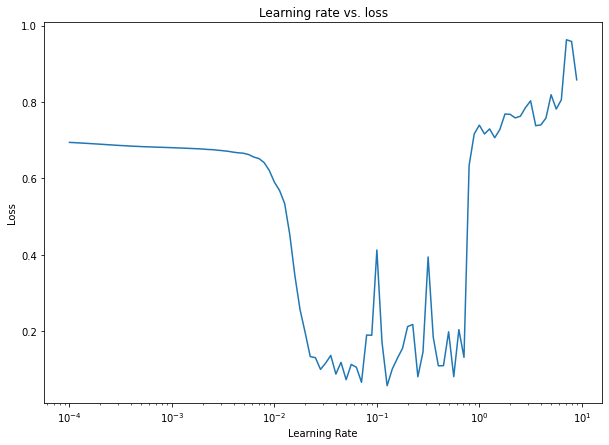

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

Để tìm ra giá trị lý tưởng của **learning rate** (ít nhất là giá trị lý tưởng để bắt đầu đào tạo mô hình của chúng ta), quy tắc chung là lấy giá trị **learning rate** mà tổn thất vẫn giảm nhưng không quá phẳng (thường nhỏ hơn khoảng 10 lần so với đáy của đường cong).

Trong trường hợp này, tỷ lệ học tập lý tưởng của chúng ta kết thúc trong khoảng 0,01 đến 0,02.

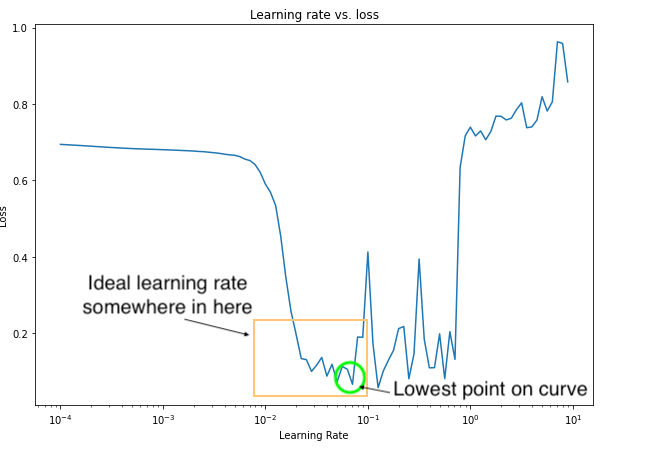

**learning rate** lý tưởng khi bắt đầu đào tạo mô hình là ở đâu đó ngay trước khi đường cong tổn thất chạm đáy (một giá trị mà tổn thất vẫn đang giảm).

Bây giờ chúng ta đã ước tính tỷ lệ **learning rate** (chúng ta sẽ sử dụng 0,02) cho mô hình của mình

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.5400
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.5511
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6638 - accuracy: 0.5568
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6416 - accuracy: 0.6380
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5957 - accuracy: 0.7609
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5134 - accuracy: 0.8213
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4595 - accuracy: 0.8078
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3685 - accuracy: 0.8941
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3248 - accuracy: 0.9016
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2665 - accuracy: 0.9386
Epoch 11/20
25/25 [

Với **learning rate** cao hơn một chút (0,02 thay vì 0,01), chúng ta đạt độ chính xác cao hơn model_8 trong ít epoch hơn (20 thay vì 25).

In [ ]:
# Evaluate model on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740181356668472, 0.9900000095367432]

doing binary classifcation...
doing binary classifcation...


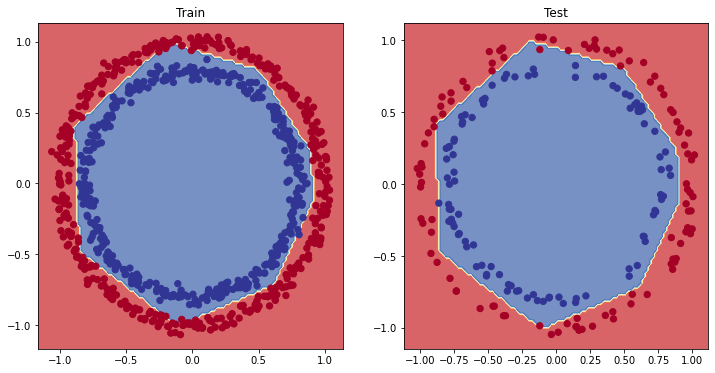

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

Như chúng ta có thể thấy, gần như hoàn hảo một lần nữa

Đây là những loại thử nghiệm ta sẽ chạy thường xuyên khi xây dựng mô hình của riêng mình



**More classification evaluation methods**



| **Metric name/Evaluation method** | **Defintion** | **Code** |
| --- | --- | --- |
| Accuracy | Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct. | [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) or [`tf.keras.metrics.Accuracy()`](tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) |
| Precision | Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0). | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) or [`tf.keras.metrics.Precision()`](tensorflow.org/api_docs/python/tf/keras/metrics/Precision) |
| Recall | Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives. | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) or [`tf.keras.metrics.Recall()`](tensorflow.org/api_docs/python/tf/keras/metrics/Recall) |
| F1-score | Combines precision and recall into one metric. 1 is best, 0 is worst. | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). | Custom function or [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) |
| Classification report | Collection of some of the main classification metrics such as precision, recall and f1-score. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |

Mỗi vấn đề phân loại sẽ yêu cầu các loại phương pháp đánh giá khác nhau.

# **confusion matrix**

Trong các bài toán phân loại, confusion matrix là một bảng đặc biệt được dùng để minh họa hiệu quả của các thuật toán..

Chúng ta có thể tạo mconfusion matrix bằng cách sử dụng phương pháp `confusion_matrix` của Scikit-Learn.

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

In [ ]:
# Make predictions
y_preds = model_10.predict(X_test)

In [ ]:
y_preds[:5]

array([[0.9852654 ],
       [0.9992379 ],
       [0.9903234 ],
       [0.9970695 ],
       [0.39622882]], dtype=float32)

Chúng ta cần đưa các dự đoán của mình sang định dạng nhị phân (0 hoặc 1).

Ở định dạng hiện tại (9.8526537e-01), chúng ở dạng được gọi là xác suất dự đoán.

Vì vậy, một trong những bước thường thấy sau khi đưa ra dự đoán với mạng nơ-ron là chuyển đổi xác suất dự đoán thành nhãn.

vì nhãn đúng cơ bản của chúng ta (y_test) là nhị phân (0 hoặc 1), chúng ta có thể chuyển đổi xác suất dự đoán bằng cách sử dụng sang dạng nhị phân của chúng bằng cách sử dụng `tf.round()`.

In [ ]:
y_preds = tf.round(y_preds)
y_preds[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

Chúng ta có thể thấy những con số cao nhất nằm dọc theo đường chéo (từ trên cùng bên trái xuống dưới cùng bên phải) vì vậy đây là một dấu hiệu tốt, nhưng phần còn lại của ma trận không thực sự cho chúng ta biết nhiều.

Trực quan hóa confusion matrix

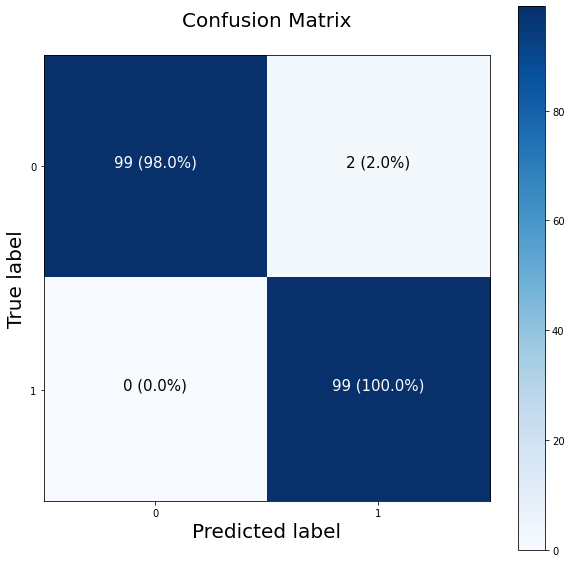

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# **Working with a larger example (multiclass classification)**

Để bắt đầu, chúng ta sẽ cần một số dữ liệu. Điều tốt cho chúng ta là TensorFlow có một tập dữ liệu cổ điển đa lớp được gọi là Fashion MNIST được tích hợp sẵn. Có nghĩa là chúng ta có thể bắt đầu ngay lập tức.



In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

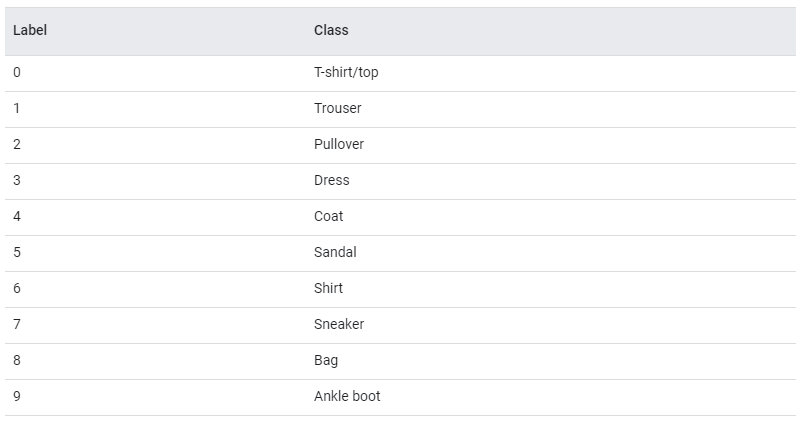

In [ ]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

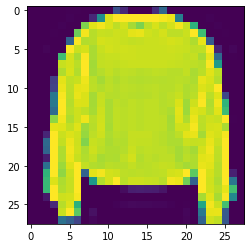

In [ ]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [ ]:

# Check our samples label
train_labels[7]

2

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

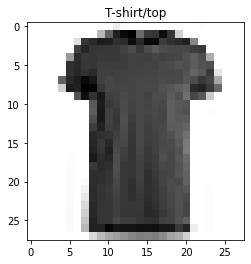

In [ ]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

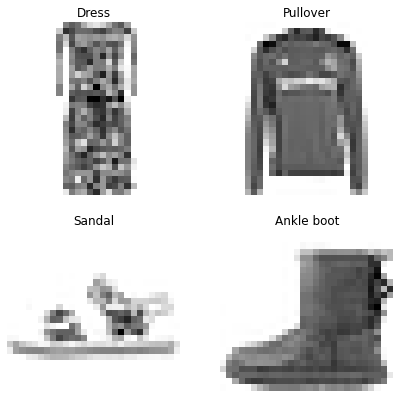

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

Ok, hãy xây dựng một mô hình để tìm ra mối quan hệ giữa các giá trị pixel và nhãn của chúng.

Vì đây là vấn đề phân loại nhiều lớp, chúng ta sẽ cần thực hiện một vài thay đổi đối với kiến ​​trúc của mình:

* **Input shape** vào sẽ phải xử lý các tensors 28x28 (chiều cao và chiều rộng của hình ảnh của chúng ta)
* **Output shape** sẽ phải là 10 vì chúng ta cần mô hình của mình để dự đoán cho 10 lớp khác nhau
>> Chúng ta sẽ thay đổi `activation parameter` của lớp đầu ra thành `softmax` thay vì `sigmoid`, 
* Chúng ta sẽ cần thay đổi hàm tổn thất của mình từ hàm tổn thất nhị phân thành hàm tổn thất đa lớp. 
>> Cụ thể hơn, vì các nhãn của chúng ta ở dạng số nguyên, chúng ta sẽ sử dụng `tf.keras.losses.SparseCategoricalCrossentropy()`, nếu các nhãn của chúng ta được mã hóa một lần (ví dụ: chúng trông giống như [0, 0, 1, 0, 0. ..]), chúng tôi sẽ sử dụng `tf.keras.losses.CategoricalCrossentropy()`.
* Chúng ta sẽ sử dụng `validation_data parameter` khi `fit()`. Điều này sẽ cung cấp cho chúng ta ý tưởng về cách mô hình hoạt động trên bộ thử nghiệm trong quá trình đào tạo.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.8192 - accuracy: 0.1345 - val_loss: 1.7951 - val_accuracy: 0.2100
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7426 - accuracy: 0.2323 - val_loss: 1.6439 - val_accuracy: 0.3022
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6413 - accuracy: 0.2837 - val_loss: 1.6003 - val_accuracy: 0.2818
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6065 - accuracy: 0.2888 - val_loss: 1.5964 - val_accuracy: 0.2958
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5988 - accuracy: 0.3031 - val_loss: 1.5948 - val_accuracy: 0.3005
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5888 - accuracy: 0.3078 - val_loss: 1.5678 - val_accuracy: 0.3195
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5668 - accuracy: 0.3213 - val_loss: 1.5695 - val_accuracy:

In [ ]:
# Check the shapes of our model
# Note: the "None" in (None, 784) is for batch_size, we'll cover this in a later module
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_29 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_30 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Mô hình của chúng ta có độ chính xác khoảng ~ 35% sau 10 epoch bằng cách sử dụng mô hình kiểu tương tự như những gì chúng ta đã sử dụng trong vấn đề phân loại nhị phân của mình

Dữ liệu chúng ta có không nằm trong khoảng từ 0 đến 1, nói cách khác, nó không được chuẩn hóa. Giá trị pixel của nó nằm trong khoảng từ 0 đến 255.

In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Chúng ta có thể nhận các giá trị này từ 0 đến 1 bằng cách chia toàn bộ mảng cho giá trị lớn nhất: 255.0 (chia cho float cũng chuyển thành float).



In [ ]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

Bây giờ dữ liệu của chúng ta nằm trong khoảng từ 0 đến 1. Hãy xem điều gì sẽ xảy ra khi chúng ta lập mô hình.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6479 - accuracy: 0.7706 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5984 - accuracy: 0.7902 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5767 - accuracy: 0.7986 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5611 - accuracy: 0.8017 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5562 - accuracy: 0.8030 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5458 - accuracy: 0.8076 - val_loss: 0.6097 - val_accuracy:

Mô hình của chúng ta đã có độ chính xác tăng rất nhiều so với trước đó

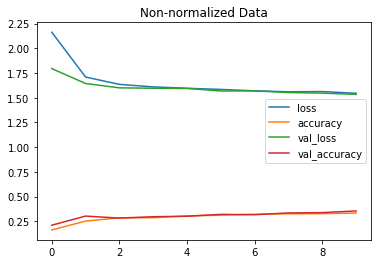

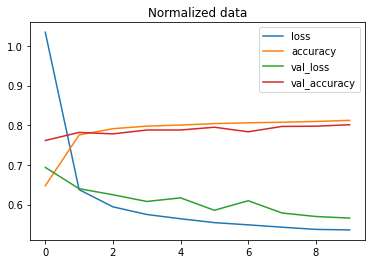

In [ ]:

import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

Từ hai biểu đồ này, chúng ta có thể thấy mô hình của chúng ta với dữ liệu chuẩn hóa (model_12) được cải thiện nhanh hơn bao nhiêu so với mô hình có dữ liệu không chuẩn hóa (model_11).

> 🔑 **Note:** Cùng một mô hình với dữ liệu thậm chí hơi khác nhau có thể tạo ra các kết quả khác nhau đáng kể. Vì vậy, khi so sánh các mô hình, điều quan trọng là phải đảm bảo rằng bạn đang so sánh chúng trên cùng một tiêu chí (ví dụ: cùng một kiến ​​trúc nhưng dữ liệu khác nhau hoặc cùng một dữ liệu nhưng kiến ​​trúc khác nhau)



**Finding learning rate**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6479 - accuracy: 0.7707 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5978 - accuracy: 0.7901 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5768 - accuracy: 0.7978 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5630 - accuracy: 0.7995 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5577 - accuracy: 0.8003 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5506 - accuracy: 0.8043 - val_loss: 0.5898 - val_accuracy:

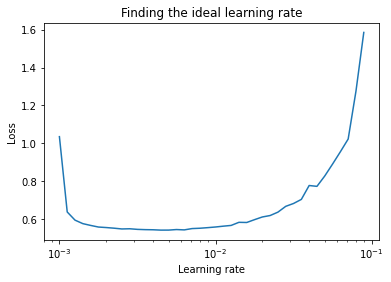

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

Có vẻ như một nơi nào đó gần với tốc độ học mặc định của  **`Adam optimer`**  (0,001) là tốc độ học lý tưởng

Hãy Hợp lại một mô hình bằng cách sử dụng tỷ lệ học tập lý tưởng

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6479 - accuracy: 0.7706 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5984 - accuracy: 0.7902 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5767 - accuracy: 0.7986 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5611 - accuracy: 0.8017 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5562 - accuracy: 0.8030 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5458 - accuracy: 0.8076 - val_loss: 0.6097 - val_accuracy:

Bây giờ chúng ta đã có một mô hình được đào tạo với tỷ lệ học tập gần lý tưởng và hoạt động khá tốt, chúng ta có một vài lựa chọn.

Chúng ta có thể:
* Đánh giá hiệu suất của nó bằng cách sử dụng các số liệu phân loại khác ( Chẳng hạn như **confusion matri** hay **classification report**)
* Đánh giá một số dự đoán của nó (thông qua hình ảnh hóa)
* Cải thiện độ chính xác của nó (bằng cách đào tạo nó lâu hơn hoặc thay đổi kiến ​​trúc).
* Lưu và xuất nó để sử dụng trong một ứng dụng


Chúng ta sẽ tạo một ma trận phân loại để trực quan hóa các dự đoán của nó trên các lớp khác nhau.

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

Vì một confusion matrix so sánh các nhãn chân lý (test_labels) với nhãn dự đoán, chúng ta phải đưa ra một số dự đoán với mô hình của mình.

In [ ]:
# Make predictions with the most recent model
y_probs = model_14.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

array([[8.5630336e-11, 3.5361509e-13, 2.6633865e-05, 4.6356046e-08,
        5.0950021e-05, 9.6119225e-02, 8.1778381e-08, 9.1868617e-02,
        4.0605213e-03, 8.0787390e-01],
       [3.4278683e-06, 1.2899412e-16, 9.5989138e-01, 2.0516255e-07,
        1.5329245e-02, 2.4532243e-13, 2.4142915e-02, 1.1383623e-28,
        6.3271803e-04, 4.4789552e-08],
       [6.1063176e-05, 9.9657673e-01, 4.3867061e-08, 3.3405994e-03,
        1.3249499e-05, 1.4383491e-21, 8.2790693e-06, 7.3237471e-18,
        5.4811817e-08, 4.9225428e-14],
       [7.5031145e-05, 9.9053687e-01, 4.2528288e-07, 9.2231687e-03,
        1.3623090e-04, 1.8276231e-18, 2.6808115e-05, 4.8124743e-14,
        1.4521548e-06, 2.2211462e-11],
       [7.2190031e-02, 1.5495797e-06, 2.5566885e-01, 1.0363121e-02,
        4.3541368e-02, 1.1069260e-13, 6.1693019e-01, 6.7543135e-23,
        1.3049162e-03, 1.2140360e-09]], dtype=float32)

Mô hình của chúng ta đưa ra một danh sách các xác suất dự đoán, nghĩa là, nó xuất ra một con số về khả năng nó nghĩ rằng một lớp cụ thể là nhãn.

Con số trong danh sách xác suất dự đoán càng cao, mô hình càng có nhiều khả năng tin rằng đó là lớp phù hợp.

Để tìm giá trị cao nhất, chúng ta có thể sử dụng phương thức `argmax()`.

In [ ]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

Bây giờ chúng ta hãy làm tương tự cho tất cả các dự đoán.

In [ ]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

Bây giờ chúng ta đã có các dự đoán của mô hình của chúng ta ở dạng nhãn, hãy tạo một confusion matrix để xem chúng dựa trên nhãn sự thật

In [ ]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

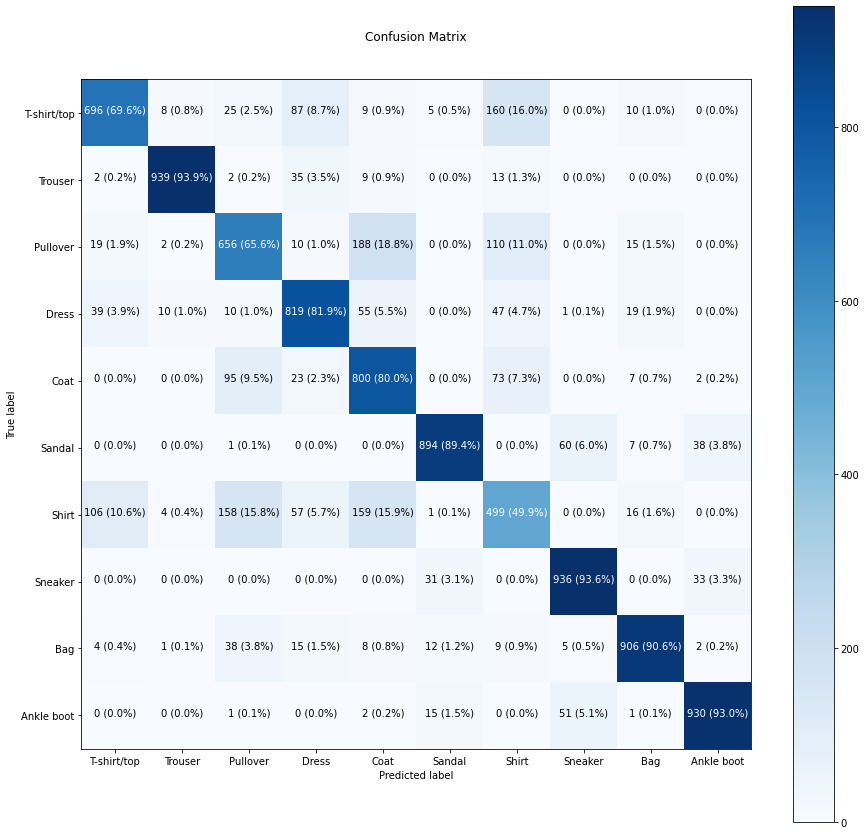

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

Có vẻ như mô hình của chúng ta đang bị nhầm lẫn giữa `Shirt` và `T-shirt/top`  (ví dụ: dự đoán Áo sơ mi khi đó thực sự là áo phông / áo phông).


Hãy tạo một hàm để vẽ một hình ảnh ngẫu nhiên cùng với dự đoán của nó.

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

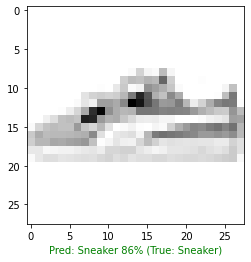

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)